In [2]:
import pandas as pd

df = pd.read_csv("M2008-2017.csv") 

Load CSV data to pandas dataframe

In [3]:
df.head()

,STATION_NUMBER,STATION_NAME,YEAR,MONTH,DAY,AIR_TEMPERATURE_MEAN_DB,AIR_TEMPERATURE_MAX_DB,AIR_TEMPERATURE_MIN_DB,WIND_PREVAILING_DIRECTION,WIND_MEAN_SPEED,...,RELATIVE_HUMIDITY_MEAN,SKY_COV_OKTES_MEAN,RELATIVE_HUMIDITY_MAX,RELATIVE_HUMIDITY_MIN,PRESSURE_MIN_SEA_LEVEL,PRESSURE_MIN_STATION_LEVEL,PRESSURE_MAX_STATION_LEVEL,PRESSURE_MAX_SEA_LEVEL,PRESSURE_MEAN_STATION_LEVEL,PRESSURE_MEAN_SEA_LEVEL
0,41030,Makkah,2008,1,1,26.7,33.8,21.0,S,2.0,...,65,0.6,90,39,1009.0,982.0,986.4,1013.4,984.2,1011.2
1,41030,Makkah,2008,1,2,26.4,33.8,21.0,WSW,1.0,...,65,0.3,87,38,1010.3,983.0,986.3,1013.1,984.7,1011.7
2,41030,Makkah,2008,1,3,26.2,33.0,22.0,WSW,1.0,...,72,1.9,92,42,1010.2,983.3,986.8,1013.9,985.0,1012.0
3,41030,Makkah,2008,1,4,25.2,30.2,22.4,N,1.0,...,65,3.5,89,48,1012.3,985.3,988.7,1015.6,986.7,1013.9
4,41030,Makkah,2008,1,5,23.8,30.4,21.0,NW,1.0,...,57,3.4,66,42,1013.3,986.0,988.9,1016.0,987.6,1014.9


In [4]:
df.columns.value_counts()

MONTH                          1
AIR_TEMPERATURE_MIN_DB         1
YEAR                           1
RELATIVE_HUMIDITY_MIN          1
PRESSURE_MEAN_STATION_LEVEL    1
RELATIVE_HUMIDITY_MAX          1
RELATIVE_HUMIDITY_MEAN         1
STATION_NAME                   1
PRESSURE_MIN_SEA_LEVEL         1
WIND_MAX_DIRECTION             1
DAY                            1
PRESSURE_MEAN_SEA_LEVEL        1
WIND_PREVAILING_DIRECTION      1
STATION_NUMBER                 1
WIND_MEAN_SPEED                1
WIND_MAX_SPEED                 1
SKY_COV_OKTES_MEAN             1
PRESSURE_MAX_SEA_LEVEL         1
PRESSURE_MAX_STATION_LEVEL     1
AIR_TEMPERATURE_MAX_DB         1
AIR_TEMPERATURE_MEAN_DB        1
PRESSURE_MIN_STATION_LEVEL     1
dtype: int64

In [5]:
df.shape

(3583, 22)

exploring the data

In [6]:
import datetime
import time

df['DATE'] = df.apply(lambda row: datetime.date(row.YEAR, row.MONTH, row.DAY), axis = 1)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d')
#df = df.drop('DATE',axis=1)

create a new column for date that concatenate year, month, and day in order to be able to plot the trend of weather attributes, as shown below at the end of this code.

In [7]:
df.head()

,STATION_NUMBER,STATION_NAME,YEAR,MONTH,DAY,AIR_TEMPERATURE_MEAN_DB,AIR_TEMPERATURE_MAX_DB,AIR_TEMPERATURE_MIN_DB,WIND_PREVAILING_DIRECTION,WIND_MEAN_SPEED,...,SKY_COV_OKTES_MEAN,RELATIVE_HUMIDITY_MAX,RELATIVE_HUMIDITY_MIN,PRESSURE_MIN_SEA_LEVEL,PRESSURE_MIN_STATION_LEVEL,PRESSURE_MAX_STATION_LEVEL,PRESSURE_MAX_SEA_LEVEL,PRESSURE_MEAN_STATION_LEVEL,PRESSURE_MEAN_SEA_LEVEL,DATE
0,41030,Makkah,2008,1,1,26.7,33.8,21.0,S,2.0,...,0.6,90,39,1009.0,982.0,986.4,1013.4,984.2,1011.2,2008-01-01
1,41030,Makkah,2008,1,2,26.4,33.8,21.0,WSW,1.0,...,0.3,87,38,1010.3,983.0,986.3,1013.1,984.7,1011.7,2008-01-02
2,41030,Makkah,2008,1,3,26.2,33.0,22.0,WSW,1.0,...,1.9,92,42,1010.2,983.3,986.8,1013.9,985.0,1012.0,2008-01-03
3,41030,Makkah,2008,1,4,25.2,30.2,22.4,N,1.0,...,3.5,89,48,1012.3,985.3,988.7,1015.6,986.7,1013.9,2008-01-04
4,41030,Makkah,2008,1,5,23.8,30.4,21.0,NW,1.0,...,3.4,66,42,1013.3,986.0,988.9,1016.0,987.6,1014.9,2008-01-05


In [8]:
df2 = df.drop('STATION_NAME',axis=1)
df = df.drop('STATION_NAME',axis=1)
df2 = df2.drop('DATE',axis=1)

segregate the dataframe into two dataframes, one for building ML model and the other for plot the digrams with dates.

In [9]:
df2.head()

,STATION_NUMBER,YEAR,MONTH,DAY,AIR_TEMPERATURE_MEAN_DB,AIR_TEMPERATURE_MAX_DB,AIR_TEMPERATURE_MIN_DB,WIND_PREVAILING_DIRECTION,WIND_MEAN_SPEED,WIND_MAX_DIRECTION,...,RELATIVE_HUMIDITY_MEAN,SKY_COV_OKTES_MEAN,RELATIVE_HUMIDITY_MAX,RELATIVE_HUMIDITY_MIN,PRESSURE_MIN_SEA_LEVEL,PRESSURE_MIN_STATION_LEVEL,PRESSURE_MAX_STATION_LEVEL,PRESSURE_MAX_SEA_LEVEL,PRESSURE_MEAN_STATION_LEVEL,PRESSURE_MEAN_SEA_LEVEL
0,41030,2008,1,1,26.7,33.8,21.0,S,2.0,19,...,65,0.6,90,39,1009.0,982.0,986.4,1013.4,984.2,1011.2
1,41030,2008,1,2,26.4,33.8,21.0,WSW,1.0,18,...,65,0.3,87,38,1010.3,983.0,986.3,1013.1,984.7,1011.7
2,41030,2008,1,3,26.2,33.0,22.0,WSW,1.0,23,...,72,1.9,92,42,1010.2,983.3,986.8,1013.9,985.0,1012.0
3,41030,2008,1,4,25.2,30.2,22.4,N,1.0,31,...,65,3.5,89,48,1012.3,985.3,988.7,1015.6,986.7,1013.9
4,41030,2008,1,5,23.8,30.4,21.0,NW,1.0,27,...,57,3.4,66,42,1013.3,986.0,988.9,1016.0,987.6,1014.9


In [10]:
df2.WIND_PREVAILING_DIRECTION.unique()

array(['S', 'WSW', 'N', 'NW', 'SSW', 'NNW', 'SW', 'W', 'NNE', 'WNW',
       'ENE', 'NE', 'CALM', 'SSE', 'N/ W', 'VRB', 'SWS', 'SIN', 'SIW',
       'W/S', 'WIN', 'S/N', 'ESE', 'E', 'SE'], dtype=object)

discovring non-numrical column

In [11]:
df2['WIND_PREVAILING_DIRECTION'] = df2['WIND_PREVAILING_DIRECTION'].map({'S':1, 'WSW':2, 'N':3, 'NW':4, 'SSW':5, 
                                                                       'NNW':6, 'SW':7, 'W':8, 'NNE':9, 'WNW':10, 
                                                                       'ENE':11, 'NE':12, 'CALM':13, 'SSE':14, 'N/ W':15, 
                                                                       'VRB':16, 'SWS':17, 'SIN':18, 'SIW':19,'W/S':20, 
                                                                       'WIN':21, 'S/N':22, 'ESE':23, 'E':24, 'SE':25})

In [12]:
df['WIND_PREVAILING_DIRECTION'] = df['WIND_PREVAILING_DIRECTION'].map({'S':1, 'WSW':2, 'N':3, 'NW':4, 'SSW':5, 
                                                                       'NNW':6, 'SW':7, 'W':8, 'NNE':9, 'WNW':10, 
                                                                       'ENE':11, 'NE':12, 'CALM':13, 'SSE':14, 'N/ W':15, 
                                                                       'VRB':16, 'SWS':17, 'SIN':18, 'SIW':19,'W/S':20, 
                                                                       'WIN':21, 'S/N':22, 'ESE':23, 'E':24, 'SE':25})

swapping the chractares that represnting wind direction with numbers in both dataframes to ease ML model processing

In [13]:
df2.isnull().sum().sum()

2

Check if there is null values

In [14]:
df2 = df2.fillna(method = 'ffill')
df = df.fillna(method = 'ffill')

using forward propgation meathod to fulfill the nulls

In [15]:
df.isnull().sum().sum()

0

Verify there is no null

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

y = df2.AIR_TEMPERATURE_MEAN_DB
df2 = df2.drop('AIR_TEMPERATURE_MEAN_DB',axis=1)

define y as a label and drop it from features x

In [17]:

x_train,x_test,y_train,y_test = train_test_split(df2,y,test_size=0.2)

split the dataset into testing and training sets with ratio of 0.2

In [18]:
from sklearn.linear_model import LinearRegression as lm
import numpy as np

model = lm().fit(x_train,y_train)
predictions = model.predict(x_test)


train the model by using LinearRegression algorithm, and findout the predection dataset

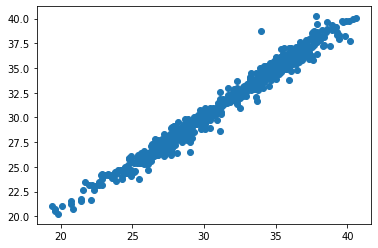

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)

almost the slop is one that means the comparison between predections and y_test is similar

In [21]:
model.score(x_test, y_test )

0.9798270442143702

97% is a perfect level of accuracy in our project

In [22]:
df.head()

,STATION_NUMBER,YEAR,MONTH,DAY,AIR_TEMPERATURE_MEAN_DB,AIR_TEMPERATURE_MAX_DB,AIR_TEMPERATURE_MIN_DB,WIND_PREVAILING_DIRECTION,WIND_MEAN_SPEED,WIND_MAX_DIRECTION,...,SKY_COV_OKTES_MEAN,RELATIVE_HUMIDITY_MAX,RELATIVE_HUMIDITY_MIN,PRESSURE_MIN_SEA_LEVEL,PRESSURE_MIN_STATION_LEVEL,PRESSURE_MAX_STATION_LEVEL,PRESSURE_MAX_SEA_LEVEL,PRESSURE_MEAN_STATION_LEVEL,PRESSURE_MEAN_SEA_LEVEL,DATE
0,41030,2008,1,1,26.7,33.8,21.0,1,2.0,19,...,0.6,90,39,1009.0,982.0,986.4,1013.4,984.2,1011.2,2008-01-01
1,41030,2008,1,2,26.4,33.8,21.0,2,1.0,18,...,0.3,87,38,1010.3,983.0,986.3,1013.1,984.7,1011.7,2008-01-02
2,41030,2008,1,3,26.2,33.0,22.0,2,1.0,23,...,1.9,92,42,1010.2,983.3,986.8,1013.9,985.0,1012.0,2008-01-03
3,41030,2008,1,4,25.2,30.2,22.4,3,1.0,31,...,3.5,89,48,1012.3,985.3,988.7,1015.6,986.7,1013.9,2008-01-04
4,41030,2008,1,5,23.8,30.4,21.0,4,1.0,27,...,3.4,66,42,1013.3,986.0,988.9,1016.0,987.6,1014.9,2008-01-05


In [23]:
df = df.set_index('DATE')

set DATE column as an index to the dataframe

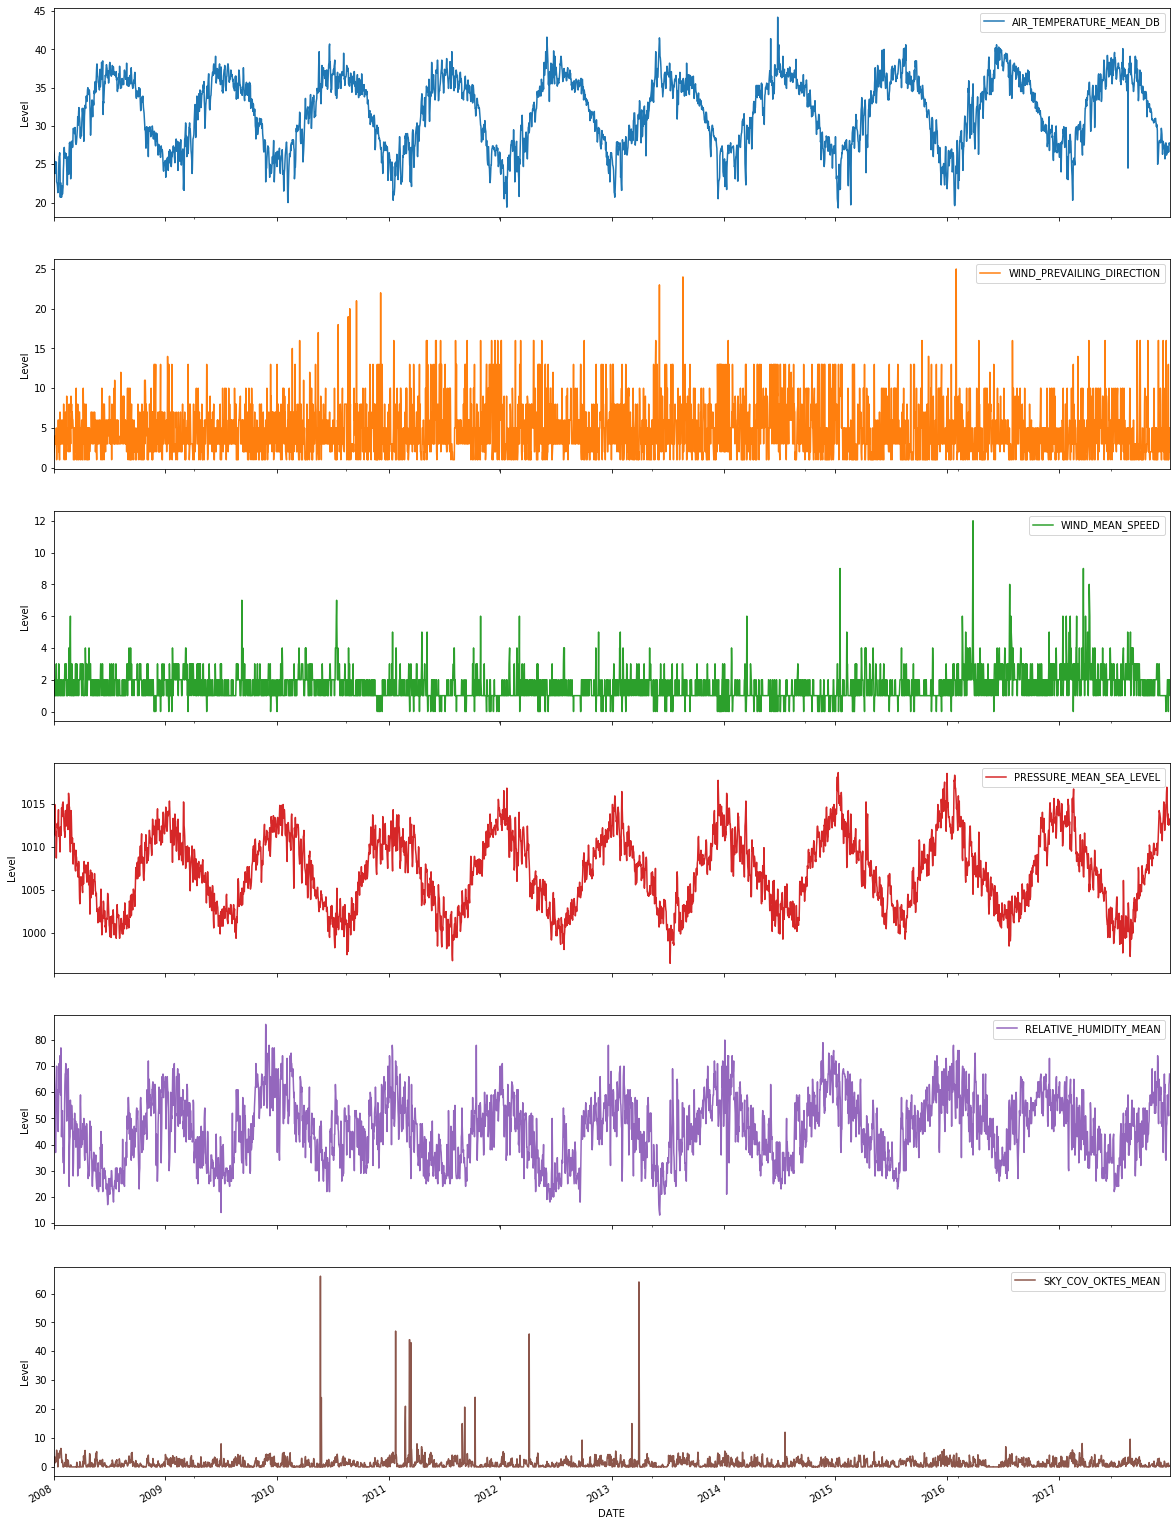

In [24]:
features = ['AIR_TEMPERATURE_MEAN_DB', 'WIND_PREVAILING_DIRECTION', 'WIND_MEAN_SPEED', 'PRESSURE_MEAN_SEA_LEVEL', 'RELATIVE_HUMIDITY_MEAN', 'SKY_COV_OKTES_MEAN']
axes = df[features].plot(marker='', alpha=1, figsize=(20, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('Level')